In [1]:
#CKVGG19-1EXP

2024-10-21 10:58:46.213074: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 10:58:46.522698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-21 10:58:47.298546: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.


2024-10-21 10:58:48.994940: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-21 10:58:49.173682: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-21 10:58:49.173851: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

CNN model has been created you can proceed to train you data with this model.


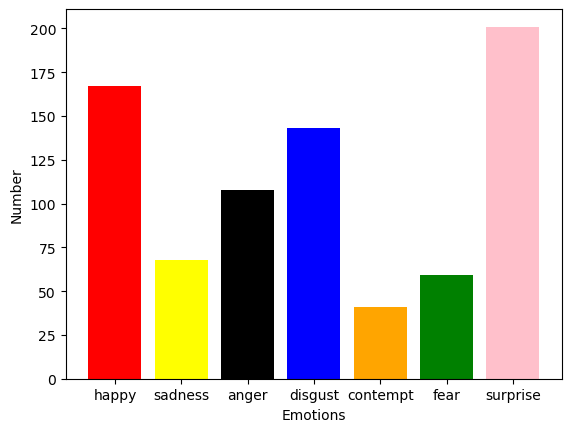

In [2]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
#plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [3]:

epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    
    
    

Epoch 1/500


/tmp/ipykernel_4532/3806955214.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,
2024-10-21 10:58:52.364161: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-10-21 10:58:52.925366: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-21 10:58:52.941562: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x33b84d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-21 10:58:52.941588: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-10-21 10:58:52.957598: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR cras

12/12 [==============================] - 4s 54ms/step - loss: 1.7985 - accuracy: 0.4274 - val_loss: 2.4561 - val_accuracy: 0.5208
Epoch 2/500
12/12 [==============================] - 0s 23ms/step - loss: 0.9114 - accuracy: 0.7005 - val_loss: 1.3228 - val_accuracy: 0.6406
Epoch 3/500
12/12 [==============================] - 0s 23ms/step - loss: 0.6366 - accuracy: 0.7746 - val_loss: 0.7386 - val_accuracy: 0.7292
Epoch 4/500
12/12 [==============================] - 0s 23ms/step - loss: 0.4511 - accuracy: 0.8490 - val_loss: 0.6581 - val_accuracy: 0.7396
Epoch 5/500
12/12 [==============================] - 0s 24ms/step - loss: 0.3886 - accuracy: 0.8603 - val_loss: 0.4884 - val_accuracy: 0.8073
Epoch 6/500
12/12 [==============================] - 0s 23ms/step - loss: 0.2996 - accuracy: 0.8935 - val_loss: 0.4094 - val_accuracy: 0.8438
Epoch 7/500
12/12 [==============================] - 0s 22ms/step - loss: 0.2683 - accuracy: 0.9018 - val_loss: 0.3244 - val_accuracy: 0.9010
Epoch 8/500
12/12 

12/12 [==============================] - 0s 22ms/step - loss: 0.0678 - accuracy: 0.9793 - val_loss: 0.1496 - val_accuracy: 0.9635
Epoch 59/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0479 - accuracy: 0.9820 - val_loss: 0.1321 - val_accuracy: 0.9688
Epoch 60/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0406 - accuracy: 0.9903 - val_loss: 0.1221 - val_accuracy: 0.9740
Epoch 61/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0372 - accuracy: 0.9848 - val_loss: 0.1884 - val_accuracy: 0.9531
Epoch 62/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0423 - accuracy: 0.9862 - val_loss: 0.2142 - val_accuracy: 0.9583
Epoch 63/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0231 - accuracy: 0.9959 - val_loss: 0.1822 - val_accuracy: 0.9688
Epoch 64/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0238 - accuracy: 0.9931 - val_loss: 0.1788 - val_accuracy: 0.9635
Epoch 65/500

12/12 [==============================] - 0s 22ms/step - loss: 0.0117 - accuracy: 0.9986 - val_loss: 0.0856 - val_accuracy: 0.9792
Epoch 116/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0275 - accuracy: 0.9945 - val_loss: 0.0746 - val_accuracy: 0.9844
Epoch 117/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0150 - accuracy: 0.9972 - val_loss: 0.1054 - val_accuracy: 0.9740
Epoch 118/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0109 - accuracy: 0.9986 - val_loss: 0.1310 - val_accuracy: 0.9740
Epoch 119/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0205 - accuracy: 0.9945 - val_loss: 0.1413 - val_accuracy: 0.9688
Epoch 120/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.1475 - val_accuracy: 0.9688
Epoch 121/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0241 - accuracy: 0.9876 - val_loss: 0.0942 - val_accuracy: 0.9740
Epoch 

Epoch 172/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0236 - accuracy: 0.9948 - val_loss: 0.2082 - val_accuracy: 0.9792
Epoch 173/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0072 - accuracy: 0.9986 - val_loss: 0.1752 - val_accuracy: 0.9688
Epoch 174/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0624 - accuracy: 0.9876 - val_loss: 0.1527 - val_accuracy: 0.9792
Epoch 175/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0229 - accuracy: 0.9917 - val_loss: 0.1360 - val_accuracy: 0.9792
Epoch 176/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0286 - accuracy: 0.9945 - val_loss: 0.1265 - val_accuracy: 0.9792
Epoch 177/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 0.9972 - val_loss: 0.1247 - val_accuracy: 0.9792
Epoch 178/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0215 - accuracy: 0.9917 - val_loss: 0.1243 - val_accuracy:

Epoch 229/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0249 - accuracy: 0.9959 - val_loss: 0.1084 - val_accuracy: 0.9844
Epoch 230/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0066 - accuracy: 0.9972 - val_loss: 0.1531 - val_accuracy: 0.9844
Epoch 231/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0108 - accuracy: 0.9959 - val_loss: 0.1522 - val_accuracy: 0.9844
Epoch 232/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0111 - accuracy: 0.9931 - val_loss: 0.1909 - val_accuracy: 0.9688
Epoch 233/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 0.9972 - val_loss: 0.2225 - val_accuracy: 0.9688
Epoch 234/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0103 - accuracy: 0.9945 - val_loss: 0.2388 - val_accuracy: 0.9688
Epoch 235/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0073 - accuracy: 0.9986 - val_loss: 0.2099 - val_accuracy:

Epoch 286/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0159 - accuracy: 0.9945 - val_loss: 0.1600 - val_accuracy: 0.9740
Epoch 287/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0104 - accuracy: 0.9959 - val_loss: 0.1648 - val_accuracy: 0.9740
Epoch 288/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0151 - accuracy: 0.9917 - val_loss: 0.1552 - val_accuracy: 0.9740
Epoch 289/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0210 - accuracy: 0.9959 - val_loss: 0.1358 - val_accuracy: 0.9792
Epoch 290/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0086 - accuracy: 0.9986 - val_loss: 0.1300 - val_accuracy: 0.9688
Epoch 291/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.1319 - val_accuracy: 0.9688
Epoch 292/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0129 - accuracy: 0.9972 - val_loss: 0.1206 - val_accuracy:

Epoch 343/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0071 - accuracy: 0.9959 - val_loss: 0.1826 - val_accuracy: 0.9792
Epoch 344/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.1978 - val_accuracy: 0.9792
Epoch 345/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.1725 - val_accuracy: 0.9792
Epoch 346/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0231 - accuracy: 0.9945 - val_loss: 0.1639 - val_accuracy: 0.9792
Epoch 347/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.1485 - val_accuracy: 0.9792
Epoch 348/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0102 - accuracy: 0.9972 - val_loss: 0.1425 - val_accuracy: 0.9792
Epoch 349/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0088 - accuracy: 0.9986 - val_loss: 0.1529 - val_accuracy:

Epoch 400/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0076 - accuracy: 0.9959 - val_loss: 0.1227 - val_accuracy: 0.9792
Epoch 401/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.1669 - val_accuracy: 0.9740
Epoch 402/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0197 - accuracy: 0.9931 - val_loss: 0.1453 - val_accuracy: 0.9740
Epoch 403/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0105 - accuracy: 0.9959 - val_loss: 0.1812 - val_accuracy: 0.9740
Epoch 404/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0151 - accuracy: 0.9945 - val_loss: 0.2182 - val_accuracy: 0.9688
Epoch 405/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0076 - accuracy: 0.9986 - val_loss: 0.2759 - val_accuracy: 0.9688
Epoch 406/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.2417 - val_accuracy:

Epoch 457/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.1803 - val_accuracy: 0.9792
Epoch 458/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.1693 - val_accuracy: 0.9792
Epoch 459/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0114 - accuracy: 0.9945 - val_loss: 0.1526 - val_accuracy: 0.9740
Epoch 460/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.1622 - val_accuracy: 0.9792
Epoch 461/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0149 - accuracy: 0.9945 - val_loss: 0.1505 - val_accuracy: 0.9792
Epoch 462/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.1626 - val_accuracy: 0.9792
Epoch 463/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.2019 - val_accuracy:

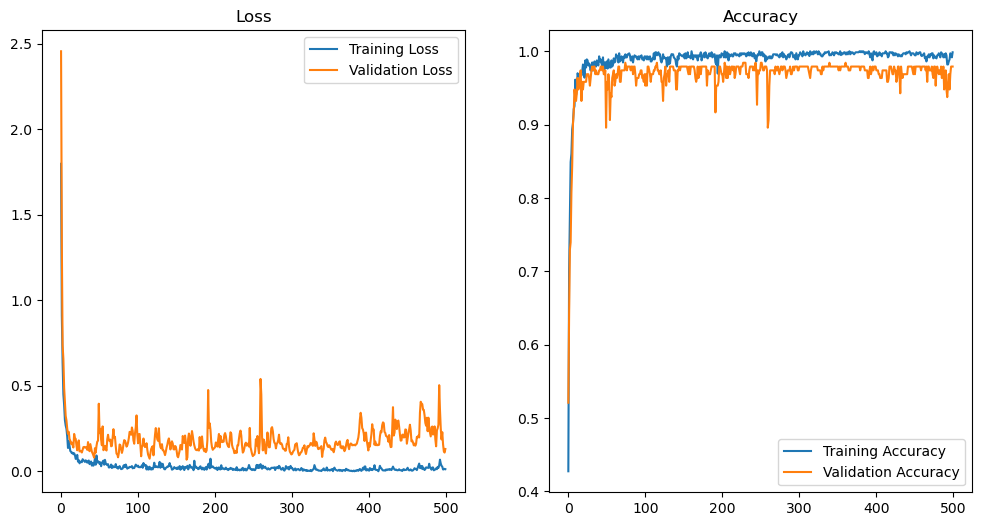

In [4]:

    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [5]:
#ckresnet--1exp

Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.
CNN model has been created you can proceed to train you data with this model.


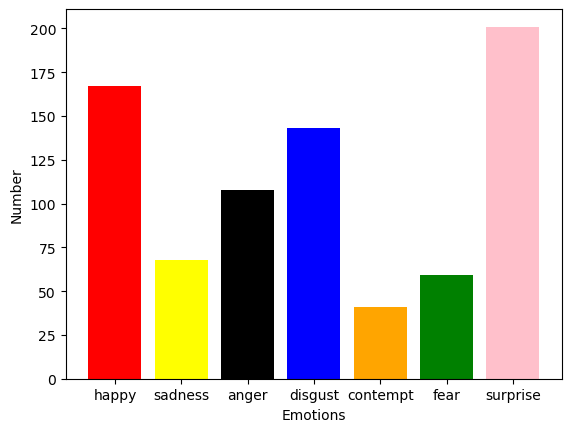

In [6]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
#plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [7]:

epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    
    
    


Epoch 1/500


/tmp/ipykernel_4532/1281752000.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,


12/12 [==============================] - 8s 211ms/step - loss: 1.5028 - accuracy: 0.5131 - val_loss: 2.6711 - val_accuracy: 0.5573
Epoch 2/500
12/12 [==============================] - 0s 32ms/step - loss: 0.8349 - accuracy: 0.6971 - val_loss: 2.1309 - val_accuracy: 0.6250
Epoch 3/500
12/12 [==============================] - 0s 30ms/step - loss: 0.5564 - accuracy: 0.7856 - val_loss: 1.5380 - val_accuracy: 0.6875
Epoch 4/500
12/12 [==============================] - 0s 30ms/step - loss: 0.4430 - accuracy: 0.8437 - val_loss: 1.4437 - val_accuracy: 0.6510
Epoch 5/500
12/12 [==============================] - 0s 30ms/step - loss: 0.3056 - accuracy: 0.8949 - val_loss: 1.1087 - val_accuracy: 0.7083
Epoch 6/500
12/12 [==============================] - 0s 30ms/step - loss: 0.2776 - accuracy: 0.8963 - val_loss: 0.9257 - val_accuracy: 0.7552
Epoch 7/500
12/12 [==============================] - 0s 30ms/step - loss: 0.2207 - accuracy: 0.9267 - val_loss: 0.8236 - val_accuracy: 0.7760
Epoch 8/500
12/12

12/12 [==============================] - 0s 30ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.1761 - val_accuracy: 0.9740
Epoch 59/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.2565 - val_accuracy: 0.9427
Epoch 60/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.1925 - val_accuracy: 0.9844
Epoch 61/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.2151 - val_accuracy: 0.9740
Epoch 62/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.2338 - val_accuracy: 0.9688
Epoch 63/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.2409 - val_accuracy: 0.9740
Epoch 64/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.2641 - val_accuracy: 0.9479
Epoch 65/500

12/12 [==============================] - 0s 30ms/step - loss: 0.0038 - accuracy: 0.9986 - val_loss: 0.2428 - val_accuracy: 0.9792
Epoch 116/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 0.2508 - val_accuracy: 0.9792
Epoch 117/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2660 - val_accuracy: 0.9792
Epoch 118/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.2896 - val_accuracy: 0.9740
Epoch 119/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0135 - accuracy: 0.9931 - val_loss: 0.2975 - val_accuracy: 0.9583
Epoch 120/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0157 - accuracy: 0.9931 - val_loss: 0.3120 - val_accuracy: 0.9740
Epoch 121/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0107 - accuracy: 0.9917 - val_loss: 0.2061 - val_accuracy: 0.9688
Epoch 

Epoch 172/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.4051 - val_accuracy: 0.9688
Epoch 173/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0388 - accuracy: 0.9862 - val_loss: 0.1583 - val_accuracy: 0.9635
Epoch 174/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0367 - accuracy: 0.9862 - val_loss: 0.3666 - val_accuracy: 0.9531
Epoch 175/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0291 - accuracy: 0.9945 - val_loss: 0.3518 - val_accuracy: 0.9688
Epoch 176/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3326 - val_accuracy: 0.9740
Epoch 177/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0107 - accuracy: 0.9959 - val_loss: 0.3782 - val_accuracy: 0.9635
Epoch 178/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0373 - accuracy: 0.9903 - val_loss: 0.3542 - val_accuracy:

Epoch 229/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.5017 - val_accuracy: 0.9635
Epoch 230/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.4377 - val_accuracy: 0.9792
Epoch 231/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0036 - accuracy: 0.9986 - val_loss: 0.3326 - val_accuracy: 0.9688
Epoch 232/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0073 - accuracy: 0.9972 - val_loss: 0.3086 - val_accuracy: 0.9792
Epoch 233/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.3287 - val_accuracy: 0.9844
Epoch 234/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0024 - accuracy: 0.9986 - val_loss: 0.3106 - val_accuracy: 0.9740
Epoch 235/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.2952 - val_accuracy:

Epoch 286/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0130 - accuracy: 0.9972 - val_loss: 0.4775 - val_accuracy: 0.9688
Epoch 287/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0603 - accuracy: 0.9931 - val_loss: 0.3861 - val_accuracy: 0.9740
Epoch 288/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0414 - accuracy: 0.9889 - val_loss: 0.4788 - val_accuracy: 0.9479
Epoch 289/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.4889 - val_accuracy: 0.9740
Epoch 290/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0210 - accuracy: 0.9972 - val_loss: 0.4579 - val_accuracy: 0.9844
Epoch 291/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0093 - accuracy: 0.9959 - val_loss: 0.5013 - val_accuracy: 0.9688
Epoch 292/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0271 - accuracy: 0.9889 - val_loss: 0.5178 - val_accuracy:

Epoch 343/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.3336 - val_accuracy: 0.9844
Epoch 344/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0024 - accuracy: 0.9987 - val_loss: 0.3264 - val_accuracy: 0.9844
Epoch 345/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.3073 - val_accuracy: 0.9844
Epoch 346/500
12/12 [==============================] - 0s 30ms/step - loss: 5.1243e-04 - accuracy: 1.0000 - val_loss: 0.2920 - val_accuracy: 0.9844
Epoch 347/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.2942 - val_accuracy: 0.9792
Epoch 348/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3091 - val_accuracy: 0.9740
Epoch 349/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.3022 - val_accur

12/12 [==============================] - 0s 31ms/step - loss: 5.4767e-04 - accuracy: 1.0000 - val_loss: 0.2874 - val_accuracy: 0.9792
Epoch 400/500
12/12 [==============================] - 0s 30ms/step - loss: 8.0655e-04 - accuracy: 1.0000 - val_loss: 0.2937 - val_accuracy: 0.9792
Epoch 401/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0014 - accuracy: 0.9986 - val_loss: 0.2940 - val_accuracy: 0.9792
Epoch 402/500
12/12 [==============================] - 0s 30ms/step - loss: 1.8080e-04 - accuracy: 1.0000 - val_loss: 0.2956 - val_accuracy: 0.9792
Epoch 403/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2975 - val_accuracy: 0.9844
Epoch 404/500
12/12 [==============================] - 0s 30ms/step - loss: 3.0831e-04 - accuracy: 1.0000 - val_loss: 0.2888 - val_accuracy: 0.9792
Epoch 405/500
12/12 [==============================] - 0s 31ms/step - loss: 3.2555e-04 - accuracy: 1.0000 - val_loss: 0.2887 - val_acc

12/12 [==============================] - 0s 30ms/step - loss: 0.0038 - accuracy: 0.9986 - val_loss: 0.2351 - val_accuracy: 0.9792
Epoch 456/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2423 - val_accuracy: 0.9792
Epoch 457/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.2257 - val_accuracy: 0.9792
Epoch 458/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0090 - accuracy: 0.9986 - val_loss: 0.2683 - val_accuracy: 0.9792
Epoch 459/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0243 - accuracy: 0.9945 - val_loss: 0.2981 - val_accuracy: 0.9583
Epoch 460/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0345 - accuracy: 0.9917 - val_loss: 0.4304 - val_accuracy: 0.9688
Epoch 461/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0214 - accuracy: 0.9917 - val_loss: 0.2539 - val_accuracy: 0.9688
Epoch 

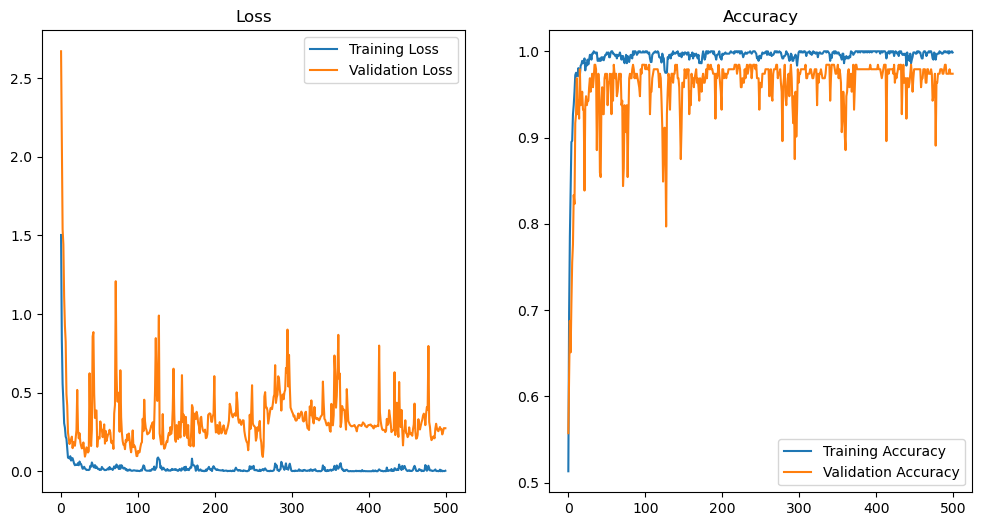

In [8]:
    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [9]:
#JAFFEVGG19---1EXP

Found 168 images belonging to 7 classes.
Found 45 images belonging to 7 classes.
Train and Validation sets have been created.


/home/rajesh/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


CNN model has been created you can proceed to train you data with this model.


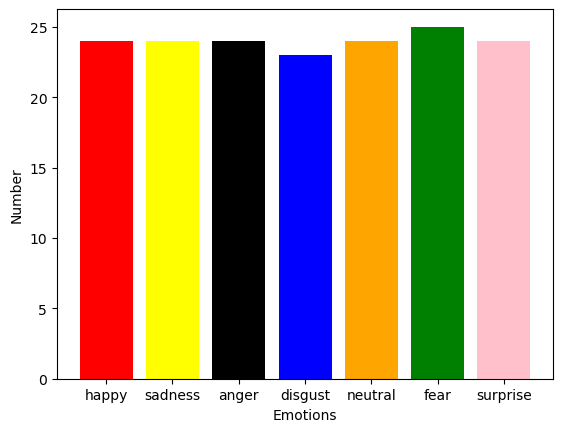

In [10]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [11]:



# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)



Epoch 1/500


2024-10-21 11:04:41.927342: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.39GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/3 [=========>....................] - ETA: 10s - loss: 2.8332 - accuracy: 0.1250

2024-10-21 11:04:45.703401: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.37GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-21 11:04:45.721561: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-21 11:04:45.821651: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-21 11:04:45.821677: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU

3/3 [==============================] - 14s 5s/step - loss: 2.7454 - accuracy: 0.1845 - val_loss: 9.3483 - val_accuracy: 0.1333
Epoch 2/500
3/3 [==============================] - 2s 453ms/step - loss: 1.9552 - accuracy: 0.3155 - val_loss: 14.5891 - val_accuracy: 0.1333
Epoch 3/500
3/3 [==============================] - 2s 449ms/step - loss: 2.1785 - accuracy: 0.2917 - val_loss: 17.6609 - val_accuracy: 0.1333
Epoch 4/500
3/3 [==============================] - 2s 476ms/step - loss: 1.9007 - accuracy: 0.2798 - val_loss: 20.0064 - val_accuracy: 0.1333
Epoch 5/500
3/3 [==============================] - 2s 602ms/step - loss: 1.8838 - accuracy: 0.3214 - val_loss: 22.6906 - val_accuracy: 0.1333
Epoch 6/500
3/3 [==============================] - 2s 457ms/step - loss: 1.8219 - accuracy: 0.3333 - val_loss: 23.9457 - val_accuracy: 0.1333
Epoch 7/500
3/3 [==============================] - 2s 599ms/step - loss: 1.4972 - accuracy: 0.5238 - val_loss: 23.9411 - val_accuracy: 0.1333
Epoch 8/500
3/3 [====

Epoch 59/500
3/3 [==============================] - 2s 450ms/step - loss: 0.3369 - accuracy: 0.8988 - val_loss: 2.4493 - val_accuracy: 0.4667
Epoch 60/500
3/3 [==============================] - 2s 595ms/step - loss: 0.2866 - accuracy: 0.9048 - val_loss: 2.3622 - val_accuracy: 0.4444
Epoch 61/500
3/3 [==============================] - 2s 451ms/step - loss: 0.2818 - accuracy: 0.8929 - val_loss: 2.4084 - val_accuracy: 0.4000
Epoch 62/500
3/3 [==============================] - 2s 596ms/step - loss: 0.3776 - accuracy: 0.8810 - val_loss: 2.4927 - val_accuracy: 0.4000
Epoch 63/500
3/3 [==============================] - 2s 450ms/step - loss: 0.3480 - accuracy: 0.8929 - val_loss: 2.5628 - val_accuracy: 0.4000
Epoch 64/500
3/3 [==============================] - 2s 587ms/step - loss: 0.2685 - accuracy: 0.9048 - val_loss: 2.3906 - val_accuracy: 0.4000
Epoch 65/500
3/3 [==============================] - 2s 448ms/step - loss: 0.4024 - accuracy: 0.8690 - val_loss: 2.0455 - val_accuracy: 0.4667
Epoch 

3/3 [==============================] - 2s 593ms/step - loss: 0.1493 - accuracy: 0.9405 - val_loss: 1.2363 - val_accuracy: 0.8222
Epoch 117/500
3/3 [==============================] - 2s 472ms/step - loss: 0.2644 - accuracy: 0.8988 - val_loss: 1.2191 - val_accuracy: 0.7778
Epoch 118/500
3/3 [==============================] - 2s 449ms/step - loss: 0.1970 - accuracy: 0.9524 - val_loss: 1.1635 - val_accuracy: 0.8222
Epoch 119/500
3/3 [==============================] - 2s 454ms/step - loss: 0.2235 - accuracy: 0.9286 - val_loss: 1.0694 - val_accuracy: 0.8444
Epoch 120/500
3/3 [==============================] - 2s 450ms/step - loss: 0.2060 - accuracy: 0.9405 - val_loss: 0.9195 - val_accuracy: 0.8444
Epoch 121/500
3/3 [==============================] - 2s 475ms/step - loss: 0.2435 - accuracy: 0.9107 - val_loss: 0.7235 - val_accuracy: 0.8444
Epoch 122/500
3/3 [==============================] - 2s 597ms/step - loss: 0.1838 - accuracy: 0.9107 - val_loss: 0.6611 - val_accuracy: 0.8667
Epoch 123/500

3/3 [==============================] - 2s 483ms/step - loss: 0.1563 - accuracy: 0.9405 - val_loss: 1.0947 - val_accuracy: 0.7778
Epoch 174/500
3/3 [==============================] - 2s 472ms/step - loss: 0.1443 - accuracy: 0.9643 - val_loss: 0.9564 - val_accuracy: 0.8222
Epoch 175/500
3/3 [==============================] - 2s 478ms/step - loss: 0.1171 - accuracy: 0.9524 - val_loss: 0.9467 - val_accuracy: 0.8444
Epoch 176/500
3/3 [==============================] - 2s 455ms/step - loss: 0.1120 - accuracy: 0.9643 - val_loss: 0.9731 - val_accuracy: 0.8222
Epoch 177/500
3/3 [==============================] - 2s 474ms/step - loss: 0.1145 - accuracy: 0.9643 - val_loss: 0.9666 - val_accuracy: 0.8222
Epoch 178/500
3/3 [==============================] - 2s 479ms/step - loss: 0.2038 - accuracy: 0.9345 - val_loss: 0.9259 - val_accuracy: 0.8444
Epoch 179/500
3/3 [==============================] - 2s 452ms/step - loss: 0.0650 - accuracy: 0.9881 - val_loss: 0.9457 - val_accuracy: 0.8222
Epoch 180/500

3/3 [==============================] - 2s 478ms/step - loss: 0.0626 - accuracy: 0.9821 - val_loss: 1.1579 - val_accuracy: 0.8444
Epoch 231/500
3/3 [==============================] - 2s 476ms/step - loss: 0.1940 - accuracy: 0.9583 - val_loss: 1.0950 - val_accuracy: 0.8667
Epoch 232/500
3/3 [==============================] - 2s 453ms/step - loss: 0.0809 - accuracy: 0.9762 - val_loss: 1.0551 - val_accuracy: 0.8667
Epoch 233/500
3/3 [==============================] - 2s 476ms/step - loss: 0.1047 - accuracy: 0.9464 - val_loss: 0.9413 - val_accuracy: 0.8667
Epoch 234/500
3/3 [==============================] - 2s 469ms/step - loss: 0.0660 - accuracy: 0.9762 - val_loss: 0.8739 - val_accuracy: 0.8444
Epoch 235/500
3/3 [==============================] - 2s 600ms/step - loss: 0.2017 - accuracy: 0.9345 - val_loss: 0.8268 - val_accuracy: 0.8444
Epoch 236/500
3/3 [==============================] - 2s 448ms/step - loss: 0.0609 - accuracy: 0.9821 - val_loss: 0.7900 - val_accuracy: 0.8444
Epoch 237/500

3/3 [==============================] - 2s 443ms/step - loss: 0.1347 - accuracy: 0.9524 - val_loss: 0.9421 - val_accuracy: 0.8667
Epoch 288/500
3/3 [==============================] - 2s 598ms/step - loss: 0.1027 - accuracy: 0.9643 - val_loss: 0.9284 - val_accuracy: 0.8444
Epoch 289/500
3/3 [==============================] - 2s 606ms/step - loss: 0.0656 - accuracy: 0.9702 - val_loss: 0.8750 - val_accuracy: 0.8667
Epoch 290/500
3/3 [==============================] - 2s 452ms/step - loss: 0.0950 - accuracy: 0.9702 - val_loss: 0.8400 - val_accuracy: 0.8889
Epoch 291/500
3/3 [==============================] - 2s 596ms/step - loss: 0.0460 - accuracy: 0.9821 - val_loss: 0.8174 - val_accuracy: 0.9111
Epoch 292/500
3/3 [==============================] - 2s 469ms/step - loss: 0.0583 - accuracy: 0.9762 - val_loss: 0.7507 - val_accuracy: 0.9111
Epoch 293/500
3/3 [==============================] - 2s 472ms/step - loss: 0.1454 - accuracy: 0.9524 - val_loss: 0.6962 - val_accuracy: 0.9111
Epoch 294/500

3/3 [==============================] - 2s 592ms/step - loss: 0.0557 - accuracy: 0.9821 - val_loss: 1.4457 - val_accuracy: 0.8222
Epoch 345/500
3/3 [==============================] - 2s 472ms/step - loss: 0.0851 - accuracy: 0.9702 - val_loss: 1.4831 - val_accuracy: 0.8222
Epoch 346/500
3/3 [==============================] - 2s 453ms/step - loss: 0.0615 - accuracy: 0.9762 - val_loss: 1.5248 - val_accuracy: 0.8222
Epoch 347/500
3/3 [==============================] - 2s 597ms/step - loss: 0.1142 - accuracy: 0.9524 - val_loss: 1.4983 - val_accuracy: 0.8444
Epoch 348/500
3/3 [==============================] - 2s 452ms/step - loss: 0.0635 - accuracy: 0.9821 - val_loss: 1.4749 - val_accuracy: 0.8667
Epoch 349/500
3/3 [==============================] - 2s 443ms/step - loss: 0.1000 - accuracy: 0.9583 - val_loss: 1.4622 - val_accuracy: 0.8667
Epoch 350/500
3/3 [==============================] - 2s 450ms/step - loss: 0.0708 - accuracy: 0.9643 - val_loss: 1.4438 - val_accuracy: 0.8667
Epoch 351/500

3/3 [==============================] - 2s 452ms/step - loss: 0.0508 - accuracy: 0.9821 - val_loss: 1.1828 - val_accuracy: 0.8222
Epoch 402/500
3/3 [==============================] - 2s 594ms/step - loss: 0.1158 - accuracy: 0.9643 - val_loss: 1.1819 - val_accuracy: 0.8444
Epoch 403/500
3/3 [==============================] - 2s 477ms/step - loss: 0.0541 - accuracy: 0.9821 - val_loss: 1.2163 - val_accuracy: 0.8444
Epoch 404/500
3/3 [==============================] - 2s 444ms/step - loss: 0.0343 - accuracy: 0.9881 - val_loss: 1.2265 - val_accuracy: 0.8667
Epoch 405/500
3/3 [==============================] - 2s 472ms/step - loss: 0.0569 - accuracy: 0.9702 - val_loss: 1.1496 - val_accuracy: 0.8889
Epoch 406/500
3/3 [==============================] - 2s 471ms/step - loss: 0.0623 - accuracy: 0.9702 - val_loss: 1.1088 - val_accuracy: 0.8889
Epoch 407/500
3/3 [==============================] - 2s 451ms/step - loss: 0.0428 - accuracy: 0.9881 - val_loss: 1.0670 - val_accuracy: 0.8889
Epoch 408/500

3/3 [==============================] - 2s 471ms/step - loss: 0.0897 - accuracy: 0.9643 - val_loss: 1.0941 - val_accuracy: 0.8889
Epoch 459/500
3/3 [==============================] - 2s 602ms/step - loss: 0.0921 - accuracy: 0.9762 - val_loss: 1.0809 - val_accuracy: 0.8889
Epoch 460/500
3/3 [==============================] - 2s 446ms/step - loss: 0.0554 - accuracy: 0.9821 - val_loss: 1.0899 - val_accuracy: 0.8889
Epoch 461/500
3/3 [==============================] - 2s 592ms/step - loss: 0.0685 - accuracy: 0.9702 - val_loss: 1.1706 - val_accuracy: 0.8889
Epoch 462/500
3/3 [==============================] - 2s 450ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 1.2197 - val_accuracy: 0.8889
Epoch 463/500
3/3 [==============================] - 2s 452ms/step - loss: 0.0258 - accuracy: 0.9881 - val_loss: 1.2136 - val_accuracy: 0.8889
Epoch 464/500
3/3 [==============================] - 2s 453ms/step - loss: 0.0875 - accuracy: 0.9702 - val_loss: 1.1545 - val_accuracy: 0.8889
Epoch 465/500

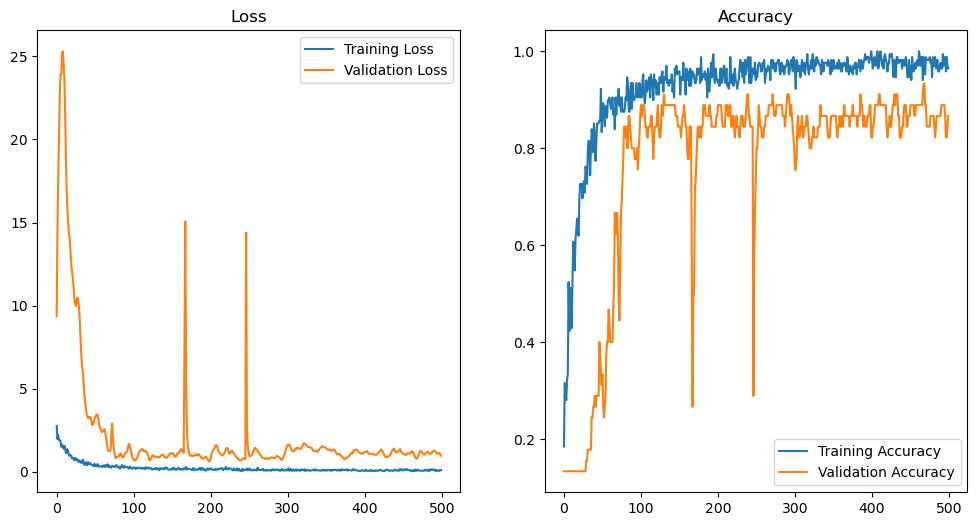

In [12]:
# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [13]:
#JAFFE RESENET----EXP2

Found 168 images belonging to 7 classes.
Found 45 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created you can proceed to train you data with this model.


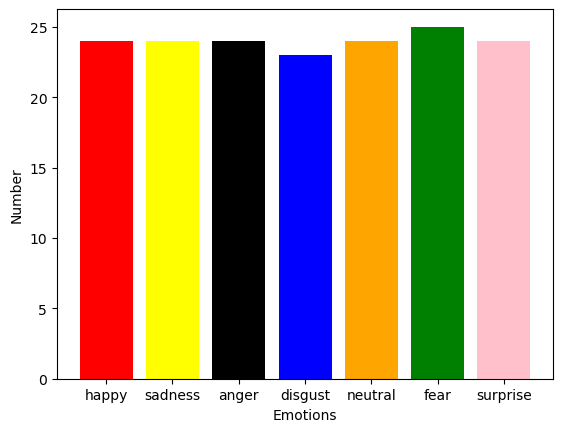

In [14]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)


#conv_base.summary()


model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')





In [15]:

# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)


Epoch 1/500
3/3 [==============================] - 12s 3s/step - loss: 3.0403 - accuracy: 0.1548 - val_loss: 7.4844 - val_accuracy: 0.1556
Epoch 2/500
3/3 [==============================] - 2s 504ms/step - loss: 2.6722 - accuracy: 0.1071 - val_loss: 7.9096 - val_accuracy: 0.1333
Epoch 3/500
3/3 [==============================] - 2s 515ms/step - loss: 2.4804 - accuracy: 0.1667 - val_loss: 6.0643 - val_accuracy: 0.1333
Epoch 4/500
3/3 [==============================] - 2s 654ms/step - loss: 2.6182 - accuracy: 0.1726 - val_loss: 9.0327 - val_accuracy: 0.1556
Epoch 5/500
3/3 [==============================] - 2s 648ms/step - loss: 2.2506 - accuracy: 0.2500 - val_loss: 13.3237 - val_accuracy: 0.1333
Epoch 6/500
3/3 [==============================] - 2s 492ms/step - loss: 2.2613 - accuracy: 0.1964 - val_loss: 21.0180 - val_accuracy: 0.1333
Epoch 7/500
3/3 [==============================] - 2s 645ms/step - loss: 2.3998 - accuracy: 0.1726 - val_loss: 23.2211 - val_accuracy: 0.1333
Epoch 8/500


3/3 [==============================] - 2s 509ms/step - loss: 1.2878 - accuracy: 0.5298 - val_loss: 7.9466 - val_accuracy: 0.1556
Epoch 59/500
3/3 [==============================] - 2s 490ms/step - loss: 1.4564 - accuracy: 0.5060 - val_loss: 8.0876 - val_accuracy: 0.1556
Epoch 60/500
3/3 [==============================] - 2s 504ms/step - loss: 1.3172 - accuracy: 0.5298 - val_loss: 9.6200 - val_accuracy: 0.1556
Epoch 61/500
3/3 [==============================] - 2s 656ms/step - loss: 1.3502 - accuracy: 0.4762 - val_loss: 11.3712 - val_accuracy: 0.1556
Epoch 62/500
3/3 [==============================] - 2s 500ms/step - loss: 1.2148 - accuracy: 0.6012 - val_loss: 12.7823 - val_accuracy: 0.1333
Epoch 63/500
3/3 [==============================] - 2s 492ms/step - loss: 1.2168 - accuracy: 0.5179 - val_loss: 12.8051 - val_accuracy: 0.1333
Epoch 64/500
3/3 [==============================] - 2s 501ms/step - loss: 1.3174 - accuracy: 0.5000 - val_loss: 10.3419 - val_accuracy: 0.1333
Epoch 65/500
3/

3/3 [==============================] - 2s 484ms/step - loss: 0.9817 - accuracy: 0.6429 - val_loss: 61.6535 - val_accuracy: 0.1556
Epoch 116/500
3/3 [==============================] - 2s 489ms/step - loss: 1.0068 - accuracy: 0.6190 - val_loss: 40.5333 - val_accuracy: 0.1556
Epoch 117/500
3/3 [==============================] - 2s 647ms/step - loss: 1.0426 - accuracy: 0.6071 - val_loss: 28.3446 - val_accuracy: 0.2000
Epoch 118/500
3/3 [==============================] - 2s 507ms/step - loss: 0.9821 - accuracy: 0.6131 - val_loss: 21.1638 - val_accuracy: 0.2222
Epoch 119/500
3/3 [==============================] - 2s 653ms/step - loss: 0.9084 - accuracy: 0.6429 - val_loss: 17.0732 - val_accuracy: 0.2222
Epoch 120/500
3/3 [==============================] - 2s 491ms/step - loss: 1.0287 - accuracy: 0.6250 - val_loss: 13.6445 - val_accuracy: 0.2667
Epoch 121/500
3/3 [==============================] - 2s 507ms/step - loss: 1.1267 - accuracy: 0.5833 - val_loss: 11.0511 - val_accuracy: 0.3111
Epoch 

3/3 [==============================] - 2s 504ms/step - loss: 0.7979 - accuracy: 0.6726 - val_loss: 1.8799 - val_accuracy: 0.4889
Epoch 173/500
3/3 [==============================] - 2s 486ms/step - loss: 0.8941 - accuracy: 0.7083 - val_loss: 2.0924 - val_accuracy: 0.4444
Epoch 174/500
3/3 [==============================] - 2s 487ms/step - loss: 0.9162 - accuracy: 0.6250 - val_loss: 2.5598 - val_accuracy: 0.4000
Epoch 175/500
3/3 [==============================] - 2s 508ms/step - loss: 0.9184 - accuracy: 0.6667 - val_loss: 3.0521 - val_accuracy: 0.3333
Epoch 176/500
3/3 [==============================] - 2s 492ms/step - loss: 0.8036 - accuracy: 0.6786 - val_loss: 2.9942 - val_accuracy: 0.3111
Epoch 177/500
3/3 [==============================] - 2s 489ms/step - loss: 0.8340 - accuracy: 0.6726 - val_loss: 2.2372 - val_accuracy: 0.4222
Epoch 178/500
3/3 [==============================] - 2s 652ms/step - loss: 0.8732 - accuracy: 0.6190 - val_loss: 1.6919 - val_accuracy: 0.5556
Epoch 179/500

3/3 [==============================] - 2s 490ms/step - loss: 0.6641 - accuracy: 0.7440 - val_loss: 2.4528 - val_accuracy: 0.4444
Epoch 230/500
3/3 [==============================] - 2s 650ms/step - loss: 0.5500 - accuracy: 0.8274 - val_loss: 2.7387 - val_accuracy: 0.4667
Epoch 231/500
3/3 [==============================] - 2s 645ms/step - loss: 0.7176 - accuracy: 0.7679 - val_loss: 2.0267 - val_accuracy: 0.6000
Epoch 232/500
3/3 [==============================] - 2s 658ms/step - loss: 0.7428 - accuracy: 0.7202 - val_loss: 1.5123 - val_accuracy: 0.6444
Epoch 233/500
3/3 [==============================] - 2s 651ms/step - loss: 0.5951 - accuracy: 0.7798 - val_loss: 1.6156 - val_accuracy: 0.5778
Epoch 234/500
3/3 [==============================] - 2s 655ms/step - loss: 0.6118 - accuracy: 0.7857 - val_loss: 1.7769 - val_accuracy: 0.5111
Epoch 235/500
3/3 [==============================] - 2s 488ms/step - loss: 0.7988 - accuracy: 0.7024 - val_loss: 1.8484 - val_accuracy: 0.5333
Epoch 236/500

3/3 [==============================] - 2s 492ms/step - loss: 0.6230 - accuracy: 0.7798 - val_loss: 2.7015 - val_accuracy: 0.3778
Epoch 287/500
3/3 [==============================] - 2s 489ms/step - loss: 0.6494 - accuracy: 0.7798 - val_loss: 3.6454 - val_accuracy: 0.3333
Epoch 288/500
3/3 [==============================] - 2s 659ms/step - loss: 0.5813 - accuracy: 0.7500 - val_loss: 4.2099 - val_accuracy: 0.3333
Epoch 289/500
3/3 [==============================] - 2s 496ms/step - loss: 0.5866 - accuracy: 0.8036 - val_loss: 4.5972 - val_accuracy: 0.3111
Epoch 290/500
3/3 [==============================] - 2s 653ms/step - loss: 0.5740 - accuracy: 0.7560 - val_loss: 3.8500 - val_accuracy: 0.3333
Epoch 291/500
3/3 [==============================] - 2s 657ms/step - loss: 0.6048 - accuracy: 0.7917 - val_loss: 3.0643 - val_accuracy: 0.3556
Epoch 292/500
3/3 [==============================] - 2s 507ms/step - loss: 0.6310 - accuracy: 0.7560 - val_loss: 2.5877 - val_accuracy: 0.4000
Epoch 293/500

3/3 [==============================] - 2s 485ms/step - loss: 0.7239 - accuracy: 0.7619 - val_loss: 2.1326 - val_accuracy: 0.4444
Epoch 344/500
3/3 [==============================] - 2s 493ms/step - loss: 0.6631 - accuracy: 0.7619 - val_loss: 1.9768 - val_accuracy: 0.5556
Epoch 345/500
3/3 [==============================] - 2s 491ms/step - loss: 0.5669 - accuracy: 0.7976 - val_loss: 1.9443 - val_accuracy: 0.6000
Epoch 346/500
3/3 [==============================] - 2s 648ms/step - loss: 0.5220 - accuracy: 0.8095 - val_loss: 1.7385 - val_accuracy: 0.6444
Epoch 347/500
3/3 [==============================] - 2s 486ms/step - loss: 0.5713 - accuracy: 0.7679 - val_loss: 1.5821 - val_accuracy: 0.6667
Epoch 348/500
3/3 [==============================] - 2s 658ms/step - loss: 0.6027 - accuracy: 0.7798 - val_loss: 1.5206 - val_accuracy: 0.6444
Epoch 349/500
3/3 [==============================] - 2s 491ms/step - loss: 0.4546 - accuracy: 0.8571 - val_loss: 1.8251 - val_accuracy: 0.6000
Epoch 350/500

3/3 [==============================] - 2s 496ms/step - loss: 0.5102 - accuracy: 0.7798 - val_loss: 4.9449 - val_accuracy: 0.3111
Epoch 401/500
3/3 [==============================] - 2s 485ms/step - loss: 0.5178 - accuracy: 0.7738 - val_loss: 5.1523 - val_accuracy: 0.2889
Epoch 402/500
3/3 [==============================] - 2s 504ms/step - loss: 0.5102 - accuracy: 0.8393 - val_loss: 7.0231 - val_accuracy: 0.2444
Epoch 403/500
3/3 [==============================] - 2s 498ms/step - loss: 0.5624 - accuracy: 0.7798 - val_loss: 8.2483 - val_accuracy: 0.2000
Epoch 404/500
3/3 [==============================] - 2s 497ms/step - loss: 0.5815 - accuracy: 0.7917 - val_loss: 8.9108 - val_accuracy: 0.2000
Epoch 405/500
3/3 [==============================] - 2s 493ms/step - loss: 0.5054 - accuracy: 0.8036 - val_loss: 8.4106 - val_accuracy: 0.2000
Epoch 406/500
3/3 [==============================] - 2s 497ms/step - loss: 0.5390 - accuracy: 0.7917 - val_loss: 7.2829 - val_accuracy: 0.2000
Epoch 407/500

3/3 [==============================] - 2s 492ms/step - loss: 0.4018 - accuracy: 0.8274 - val_loss: 3.9855 - val_accuracy: 0.2889
Epoch 458/500
3/3 [==============================] - 2s 490ms/step - loss: 0.5102 - accuracy: 0.8155 - val_loss: 5.3128 - val_accuracy: 0.2667
Epoch 459/500
3/3 [==============================] - 2s 501ms/step - loss: 0.4761 - accuracy: 0.8631 - val_loss: 4.4194 - val_accuracy: 0.3111
Epoch 460/500
3/3 [==============================] - 2s 642ms/step - loss: 0.4973 - accuracy: 0.8155 - val_loss: 3.0932 - val_accuracy: 0.4222
Epoch 461/500
3/3 [==============================] - 2s 651ms/step - loss: 0.5302 - accuracy: 0.8274 - val_loss: 2.5074 - val_accuracy: 0.5111
Epoch 462/500
3/3 [==============================] - 2s 662ms/step - loss: 0.4800 - accuracy: 0.8155 - val_loss: 1.9172 - val_accuracy: 0.6000
Epoch 463/500
3/3 [==============================] - 2s 515ms/step - loss: 0.4607 - accuracy: 0.8274 - val_loss: 2.0112 - val_accuracy: 0.5333
Epoch 464/500

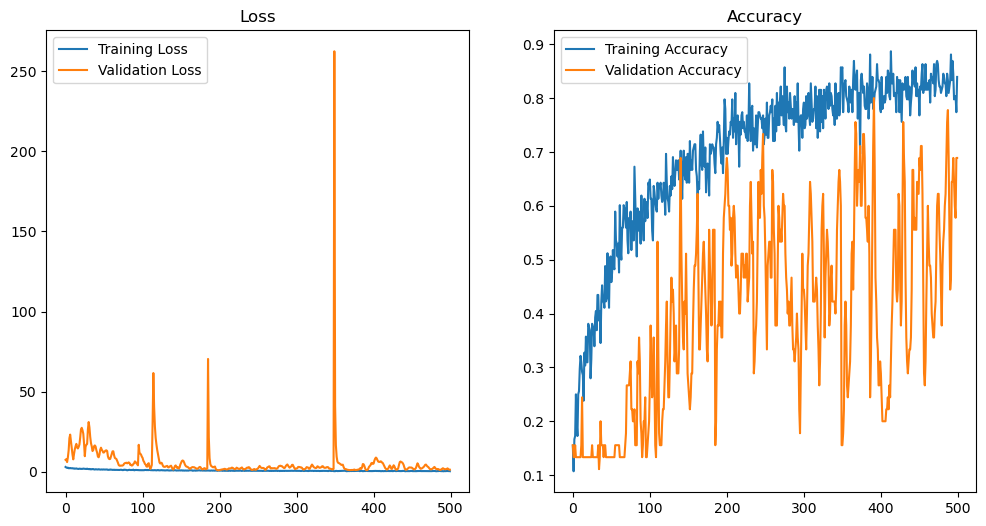

In [16]:

# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [17]:
#FER2013VGG19---EXP1

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created, you can proceed to train your data with this model.


In [19]:
# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)

# Print training history
print(history.history)



Epoch 1/500
225/225 [==============================] - 19s 76ms/step - loss: 2.4028 - accuracy: 0.2075 - val_loss: 1.7906 - val_accuracy: 0.3103
Epoch 2/500
225/225 [==============================] - 15s 66ms/step - loss: 2.1650 - accuracy: 0.2481 - val_loss: 1.7427 - val_accuracy: 0.3317
Epoch 3/500
225/225 [==============================] - 15s 66ms/step - loss: 2.0511 - accuracy: 0.2627 - val_loss: 1.7190 - val_accuracy: 0.3352
Epoch 4/500
225/225 [==============================] - 15s 66ms/step - loss: 1.9820 - accuracy: 0.2711 - val_loss: 1.7018 - val_accuracy: 0.3366
Epoch 5/500
225/225 [==============================] - 15s 66ms/step - loss: 1.9463 - accuracy: 0.2779 - val_loss: 1.6848 - val_accuracy: 0.3413
Epoch 6/500
225/225 [==============================] - 15s 66ms/step - loss: 1.9043 - accuracy: 0.2838 - val_loss: 1.6632 - val_accuracy: 0.3456
Epoch 7/500
225/225 [==============================] - 15s 66ms/step - loss: 1.8703 - accuracy: 0.2899 - val_loss: 1.6482 - val_ac

225/225 [==============================] - 15s 66ms/step - loss: 1.5740 - accuracy: 0.3812 - val_loss: 1.5284 - val_accuracy: 0.4023
Epoch 58/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5675 - accuracy: 0.3843 - val_loss: 1.5333 - val_accuracy: 0.3997
Epoch 59/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5717 - accuracy: 0.3828 - val_loss: 1.5345 - val_accuracy: 0.3975
Epoch 60/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5659 - accuracy: 0.3855 - val_loss: 1.5287 - val_accuracy: 0.3994
Epoch 61/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5686 - accuracy: 0.3819 - val_loss: 1.5347 - val_accuracy: 0.3990
Epoch 62/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5680 - accuracy: 0.3853 - val_loss: 1.5310 - val_accuracy: 0.3982
Epoch 63/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5639 - accuracy: 0.3864 - val_loss: 1.5318 - val_accuracy

225/225 [==============================] - 15s 67ms/step - loss: 1.5228 - accuracy: 0.4073 - val_loss: 1.5038 - val_accuracy: 0.4189
Epoch 114/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5251 - accuracy: 0.4028 - val_loss: 1.5019 - val_accuracy: 0.4132
Epoch 115/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5231 - accuracy: 0.4072 - val_loss: 1.5065 - val_accuracy: 0.4154
Epoch 116/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5233 - accuracy: 0.4023 - val_loss: 1.5101 - val_accuracy: 0.4118
Epoch 117/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5206 - accuracy: 0.4059 - val_loss: 1.5029 - val_accuracy: 0.4152
Epoch 118/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5209 - accuracy: 0.4060 - val_loss: 1.5082 - val_accuracy: 0.4114
Epoch 119/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5208 - accuracy: 0.4072 - val_loss: 1.5054 - val_ac

Epoch 169/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4934 - accuracy: 0.4181 - val_loss: 1.5036 - val_accuracy: 0.4182
Epoch 170/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4890 - accuracy: 0.4212 - val_loss: 1.5023 - val_accuracy: 0.4218
Epoch 171/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4947 - accuracy: 0.4173 - val_loss: 1.4985 - val_accuracy: 0.4245
Epoch 172/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4894 - accuracy: 0.4192 - val_loss: 1.5005 - val_accuracy: 0.4239
Epoch 173/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4884 - accuracy: 0.4190 - val_loss: 1.4921 - val_accuracy: 0.4266
Epoch 174/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4912 - accuracy: 0.4179 - val_loss: 1.5012 - val_accuracy: 0.4227
Epoch 175/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4888 - accuracy: 0.4179 - val_loss: 1

Epoch 225/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4762 - accuracy: 0.4261 - val_loss: 1.4866 - val_accuracy: 0.4312
Epoch 226/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4726 - accuracy: 0.4297 - val_loss: 1.4901 - val_accuracy: 0.4277
Epoch 227/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4736 - accuracy: 0.4254 - val_loss: 1.4826 - val_accuracy: 0.4313
Epoch 228/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4746 - accuracy: 0.4208 - val_loss: 1.4950 - val_accuracy: 0.4211
Epoch 229/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4645 - accuracy: 0.4257 - val_loss: 1.4876 - val_accuracy: 0.4218
Epoch 230/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4756 - accuracy: 0.4222 - val_loss: 1.4881 - val_accuracy: 0.4296
Epoch 231/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4645 - accuracy: 0.4277 - val_loss: 1

Epoch 281/500
225/225 [==============================] - 23s 101ms/step - loss: 1.4534 - accuracy: 0.4357 - val_loss: 1.4846 - val_accuracy: 0.4348
Epoch 282/500
225/225 [==============================] - 22s 100ms/step - loss: 1.4537 - accuracy: 0.4393 - val_loss: 1.4993 - val_accuracy: 0.4349
Epoch 283/500
225/225 [==============================] - 22s 99ms/step - loss: 1.4530 - accuracy: 0.4378 - val_loss: 1.4842 - val_accuracy: 0.4372
Epoch 284/500
225/225 [==============================] - 22s 99ms/step - loss: 1.4509 - accuracy: 0.4366 - val_loss: 1.4792 - val_accuracy: 0.4430
Epoch 285/500
225/225 [==============================] - 23s 102ms/step - loss: 1.4527 - accuracy: 0.4363 - val_loss: 1.4919 - val_accuracy: 0.4298
Epoch 286/500
225/225 [==============================] - 23s 101ms/step - loss: 1.4569 - accuracy: 0.4300 - val_loss: 1.4947 - val_accuracy: 0.4284
Epoch 287/500
225/225 [==============================] - 23s 101ms/step - loss: 1.4480 - accuracy: 0.4354 - val_lo

225/225 [==============================] - 15s 66ms/step - loss: 1.4421 - accuracy: 0.4418 - val_loss: 1.4919 - val_accuracy: 0.4359
Epoch 337/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4438 - accuracy: 0.4400 - val_loss: 1.4923 - val_accuracy: 0.4319
Epoch 338/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4415 - accuracy: 0.4423 - val_loss: 1.4913 - val_accuracy: 0.4374
Epoch 339/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4406 - accuracy: 0.4415 - val_loss: 1.4940 - val_accuracy: 0.4348
Epoch 340/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4495 - accuracy: 0.4360 - val_loss: 1.4945 - val_accuracy: 0.4305
Epoch 341/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4379 - accuracy: 0.4408 - val_loss: 1.4865 - val_accuracy: 0.4322
Epoch 342/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4395 - accuracy: 0.4399 - val_loss: 1.4806 - val_ac

Epoch 392/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4392 - accuracy: 0.4414 - val_loss: 1.4721 - val_accuracy: 0.4405
Epoch 393/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4329 - accuracy: 0.4433 - val_loss: 1.4805 - val_accuracy: 0.4387
Epoch 394/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4297 - accuracy: 0.4457 - val_loss: 1.4863 - val_accuracy: 0.4344
Epoch 395/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4311 - accuracy: 0.4429 - val_loss: 1.4731 - val_accuracy: 0.4387
Epoch 396/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4258 - accuracy: 0.4485 - val_loss: 1.4801 - val_accuracy: 0.4335
Epoch 397/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4307 - accuracy: 0.4450 - val_loss: 1.4860 - val_accuracy: 0.4394
Epoch 398/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4261 - accuracy: 0.4471 - val_loss: 1

Epoch 448/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4245 - accuracy: 0.4467 - val_loss: 1.4790 - val_accuracy: 0.4411
Epoch 449/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4216 - accuracy: 0.4505 - val_loss: 1.4899 - val_accuracy: 0.4347
Epoch 450/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4156 - accuracy: 0.4516 - val_loss: 1.4904 - val_accuracy: 0.4373
Epoch 451/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4178 - accuracy: 0.4492 - val_loss: 1.4826 - val_accuracy: 0.4388
Epoch 452/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4154 - accuracy: 0.4510 - val_loss: 1.4909 - val_accuracy: 0.4398
Epoch 453/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4165 - accuracy: 0.4502 - val_loss: 1.4858 - val_accuracy: 0.4344
Epoch 454/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4221 - accuracy: 0.4503 - val_loss: 1

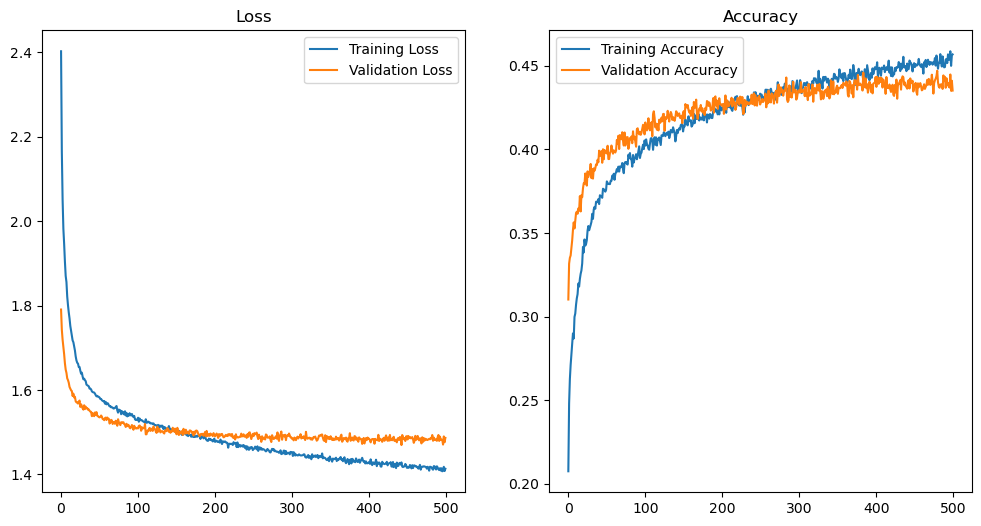

In [20]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [21]:
#ferresnet---EXP1

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')



from keras.applications.resnet import ResNet152
base_model = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created, you can proceed to train your data with this model.


In [23]:

# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)

# Print training history
print(history.history)



Epoch 1/500
225/225 [==============================] - 25s 84ms/step - loss: 2.4156 - accuracy: 0.1759 - val_loss: 1.9067 - val_accuracy: 0.2037
Epoch 2/500
225/225 [==============================] - 16s 70ms/step - loss: 2.2286 - accuracy: 0.2032 - val_loss: 2.2057 - val_accuracy: 0.2522
Epoch 3/500
225/225 [==============================] - 16s 70ms/step - loss: 2.1454 - accuracy: 0.2162 - val_loss: 2.3103 - val_accuracy: 0.2492
Epoch 4/500
225/225 [==============================] - 16s 70ms/step - loss: 2.0749 - accuracy: 0.2299 - val_loss: 1.9000 - val_accuracy: 0.2662
Epoch 5/500
225/225 [==============================] - 16s 70ms/step - loss: 2.0418 - accuracy: 0.2369 - val_loss: 1.7922 - val_accuracy: 0.2870
Epoch 6/500
225/225 [==============================] - 16s 70ms/step - loss: 2.0080 - accuracy: 0.2408 - val_loss: 1.7676 - val_accuracy: 0.2973
Epoch 7/500
225/225 [==============================] - 16s 70ms/step - loss: 1.9770 - accuracy: 0.2452 - val_loss: 1.7599 - val_ac

225/225 [==============================] - 35s 157ms/step - loss: 1.6795 - accuracy: 0.3342 - val_loss: 1.6688 - val_accuracy: 0.3498
Epoch 58/500
225/225 [==============================] - 36s 162ms/step - loss: 1.6721 - accuracy: 0.3376 - val_loss: 1.6989 - val_accuracy: 0.3455
Epoch 59/500
225/225 [==============================] - 35s 156ms/step - loss: 1.6784 - accuracy: 0.3368 - val_loss: 1.8653 - val_accuracy: 0.3016
Epoch 60/500
225/225 [==============================] - 32s 142ms/step - loss: 1.6774 - accuracy: 0.3340 - val_loss: 1.6785 - val_accuracy: 0.3278
Epoch 61/500
225/225 [==============================] - 34s 150ms/step - loss: 1.6772 - accuracy: 0.3355 - val_loss: 1.6151 - val_accuracy: 0.3597
Epoch 62/500
225/225 [==============================] - 34s 150ms/step - loss: 1.6736 - accuracy: 0.3376 - val_loss: 1.5929 - val_accuracy: 0.3791
Epoch 63/500
225/225 [==============================] - 36s 158ms/step - loss: 1.6697 - accuracy: 0.3428 - val_loss: 1.6541 - val_a

Epoch 113/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6430 - accuracy: 0.3530 - val_loss: 1.7844 - val_accuracy: 0.3331
Epoch 114/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6490 - accuracy: 0.3467 - val_loss: 1.8540 - val_accuracy: 0.2770
Epoch 115/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6474 - accuracy: 0.3475 - val_loss: 1.6650 - val_accuracy: 0.3378
Epoch 116/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6474 - accuracy: 0.3500 - val_loss: 1.6982 - val_accuracy: 0.3408
Epoch 117/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6469 - accuracy: 0.3475 - val_loss: 1.7662 - val_accuracy: 0.3144
Epoch 118/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6440 - accuracy: 0.3506 - val_loss: 1.6422 - val_accuracy: 0.3532
Epoch 119/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6479 - accuracy: 0.3521 - val_loss: 1

Epoch 169/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6288 - accuracy: 0.3579 - val_loss: 1.6856 - val_accuracy: 0.3324
Epoch 170/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6295 - accuracy: 0.3577 - val_loss: 1.5913 - val_accuracy: 0.3640
Epoch 171/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6258 - accuracy: 0.3604 - val_loss: 1.7656 - val_accuracy: 0.3448
Epoch 172/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6285 - accuracy: 0.3609 - val_loss: 1.6179 - val_accuracy: 0.3668
Epoch 173/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6280 - accuracy: 0.3566 - val_loss: 1.8655 - val_accuracy: 0.3324
Epoch 174/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6283 - accuracy: 0.3563 - val_loss: 1.7456 - val_accuracy: 0.3442
Epoch 175/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6277 - accuracy: 0.3580 - val_loss: 1

Epoch 225/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6194 - accuracy: 0.3630 - val_loss: 1.7167 - val_accuracy: 0.3327
Epoch 226/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6165 - accuracy: 0.3642 - val_loss: 1.6372 - val_accuracy: 0.3642
Epoch 227/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6126 - accuracy: 0.3646 - val_loss: 1.6181 - val_accuracy: 0.3651
Epoch 228/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6191 - accuracy: 0.3645 - val_loss: 1.5720 - val_accuracy: 0.3874
Epoch 229/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6163 - accuracy: 0.3661 - val_loss: 1.7554 - val_accuracy: 0.3218
Epoch 230/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6147 - accuracy: 0.3640 - val_loss: 1.5711 - val_accuracy: 0.3794
Epoch 231/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6134 - accuracy: 0.3640 - val_loss: 1

225/225 [==============================] - 18s 80ms/step - loss: 1.6029 - accuracy: 0.3692 - val_loss: 1.6215 - val_accuracy: 0.3748
Epoch 281/500
225/225 [==============================] - 18s 79ms/step - loss: 1.6057 - accuracy: 0.3680 - val_loss: 1.5870 - val_accuracy: 0.3905
Epoch 282/500
225/225 [==============================] - 18s 80ms/step - loss: 1.6090 - accuracy: 0.3672 - val_loss: 1.6471 - val_accuracy: 0.3604
Epoch 283/500
225/225 [==============================] - 19s 83ms/step - loss: 1.6061 - accuracy: 0.3698 - val_loss: 1.6141 - val_accuracy: 0.3633
Epoch 284/500
225/225 [==============================] - 17s 78ms/step - loss: 1.6032 - accuracy: 0.3687 - val_loss: 1.8973 - val_accuracy: 0.3348
Epoch 285/500
225/225 [==============================] - 18s 80ms/step - loss: 1.6027 - accuracy: 0.3701 - val_loss: 1.6567 - val_accuracy: 0.3270
Epoch 286/500
225/225 [==============================] - 17s 75ms/step - loss: 1.5968 - accuracy: 0.3742 - val_loss: 1.5847 - val_ac

Epoch 336/500
225/225 [==============================] - 17s 77ms/step - loss: 1.5963 - accuracy: 0.3731 - val_loss: 1.6808 - val_accuracy: 0.3423
Epoch 337/500
225/225 [==============================] - 18s 79ms/step - loss: 1.5989 - accuracy: 0.3725 - val_loss: 1.7391 - val_accuracy: 0.3398
Epoch 338/500
225/225 [==============================] - 17s 74ms/step - loss: 1.5975 - accuracy: 0.3724 - val_loss: 1.5169 - val_accuracy: 0.4040
Epoch 339/500
225/225 [==============================] - 16s 72ms/step - loss: 1.6023 - accuracy: 0.3731 - val_loss: 1.6951 - val_accuracy: 0.3238
Epoch 340/500
225/225 [==============================] - 18s 79ms/step - loss: 1.6041 - accuracy: 0.3696 - val_loss: 1.7258 - val_accuracy: 0.3155
Epoch 341/500
225/225 [==============================] - 17s 76ms/step - loss: 1.5996 - accuracy: 0.3728 - val_loss: 1.6109 - val_accuracy: 0.3760
Epoch 342/500
225/225 [==============================] - 16s 72ms/step - loss: 1.5971 - accuracy: 0.3734 - val_loss: 1

Epoch 392/500
225/225 [==============================] - 17s 76ms/step - loss: 1.5915 - accuracy: 0.3751 - val_loss: 1.8987 - val_accuracy: 0.3183
Epoch 393/500
225/225 [==============================] - 18s 78ms/step - loss: 1.5964 - accuracy: 0.3758 - val_loss: 1.6918 - val_accuracy: 0.3434
Epoch 394/500
225/225 [==============================] - 17s 76ms/step - loss: 1.5913 - accuracy: 0.3766 - val_loss: 1.5710 - val_accuracy: 0.3770
Epoch 395/500
225/225 [==============================] - 18s 79ms/step - loss: 1.5920 - accuracy: 0.3758 - val_loss: 1.5871 - val_accuracy: 0.3693
Epoch 396/500
225/225 [==============================] - 17s 76ms/step - loss: 1.5934 - accuracy: 0.3771 - val_loss: 1.6089 - val_accuracy: 0.3724
Epoch 397/500
225/225 [==============================] - 18s 78ms/step - loss: 1.5977 - accuracy: 0.3763 - val_loss: 1.5899 - val_accuracy: 0.3876
Epoch 398/500
225/225 [==============================] - 18s 78ms/step - loss: 1.5975 - accuracy: 0.3709 - val_loss: 1

Epoch 448/500
225/225 [==============================] - 17s 77ms/step - loss: 1.5857 - accuracy: 0.3760 - val_loss: 1.8062 - val_accuracy: 0.2903
Epoch 449/500
225/225 [==============================] - 17s 75ms/step - loss: 1.5899 - accuracy: 0.3800 - val_loss: 1.9385 - val_accuracy: 0.2977
Epoch 450/500
225/225 [==============================] - 17s 77ms/step - loss: 1.5930 - accuracy: 0.3786 - val_loss: 1.8387 - val_accuracy: 0.3277
Epoch 451/500
225/225 [==============================] - 17s 75ms/step - loss: 1.5923 - accuracy: 0.3769 - val_loss: 1.7602 - val_accuracy: 0.2962
Epoch 452/500
225/225 [==============================] - 17s 76ms/step - loss: 1.5881 - accuracy: 0.3775 - val_loss: 1.6354 - val_accuracy: 0.3615
Epoch 453/500
225/225 [==============================] - 17s 74ms/step - loss: 1.5907 - accuracy: 0.3774 - val_loss: 1.6947 - val_accuracy: 0.3250
Epoch 454/500
225/225 [==============================] - 17s 76ms/step - loss: 1.5880 - accuracy: 0.3802 - val_loss: 1

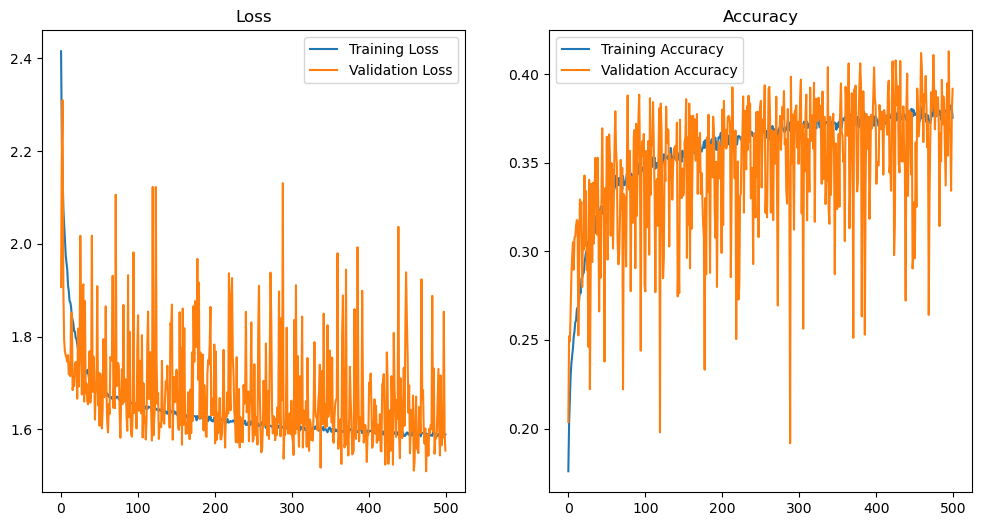

In [24]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()